# Машинное обучение, ФКН ВШЭ

# Практическое задание 2

## Общая информация

### О задании
На сайтах для поиска работы можно найти сотни тысяч объявлений, каждое из которых состоит из пространного описания вакансии и предлагаемой зарплаты. Есть ли связь между описанием и зарплатой? Существуют ли определенные слова, которые наиболее сильно характеризуют зарплату? Можно ли найти другие информативные факторы? Вам предстоит ответить на эти вопросы, проанализировав выборку объявлений о работе в Великобритании.

Практическое задание 2 посвящено работе с текстовыми данными и категориальными признаками и задачам бинарной классификации. Вы научитесь:
 * работать с категориальными признаками;
 * строить вещественные представления текстовых данных;
 * обучать и строить прогнозы линейных классификаторов при помощи scikit-learn;
 * тестировать модели и проводить оценку качества в задачах бинарной классификации.


### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на Smorodinov-1990@mail.ru.

## Данные

Как было упомянуто ранее, в рамках данного задания мы будем решать задачу бинарной классификации для предсказания уровня заработной платы по тексту объявления о вакансии на примере набора данных об [аналитиках данных](https://www.kaggle.com/datasets/andrewmvd/data-analyst-jobs).

Посмотрим на данные в файле и загрузим их в DataFrame:

In [1]:
%pylab inline

import pandas as pd

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('DataAnalyst.csv', sep=',')
print(df.shape)
df.head()

(2253, 16)


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


Рассмотрим задачу бинарной классификации, разделив объекты на 2 группы: объявления о вакансиях с низкой и высокой зарплатами соответственно.

<img src = "http://salt.uaa.alaska.edu/kath/kti/mean_median2.gif">

В качестве порога разбиения объектов на группы будем рассматривать медиану признака Salary Estimate. Заметим, что таким образом мы автоматически получим задачу классификации со сбалансированными классами:

$37K-$66K (Glassdoor est.)
51500.0
69000.0


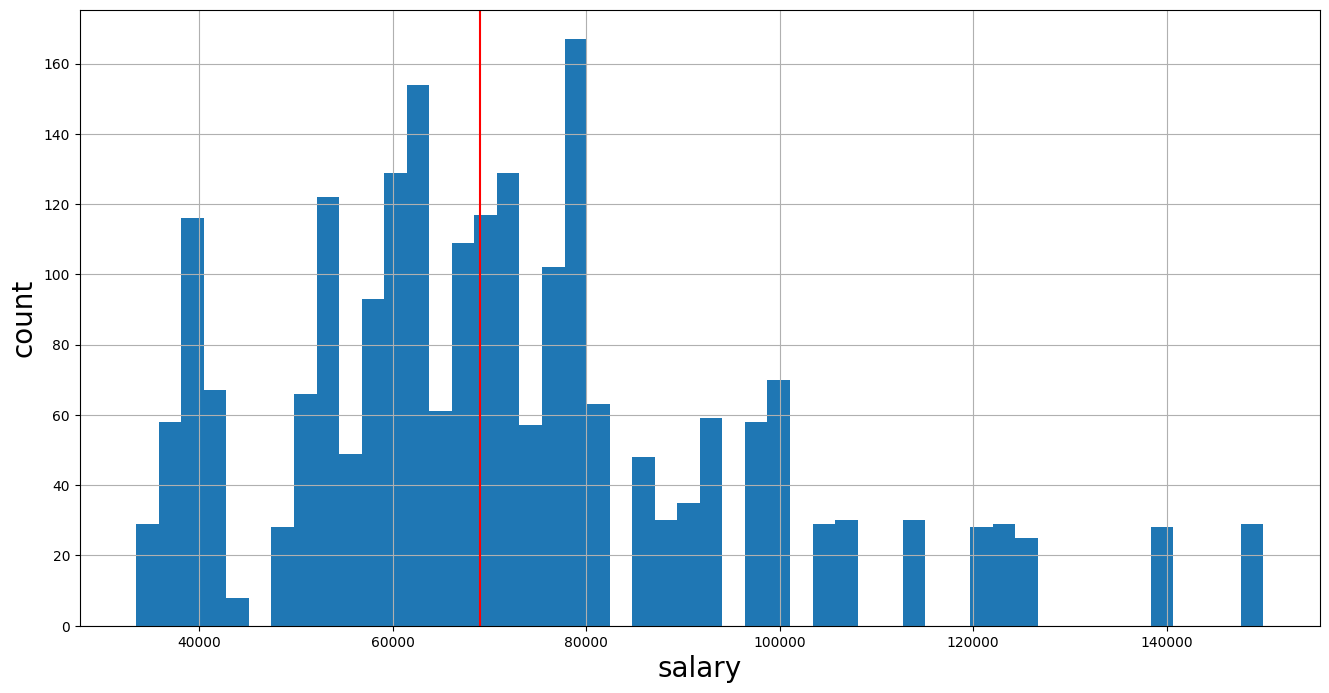

In [3]:
import re

def count_aver_salary(salary):
    cleaned_salary = re.sub(r'\s*\(.*\)', '', salary)
    numbers = re.findall(r'\d+', cleaned_salary)
    lower, upper = map(int, numbers)
    return (lower + upper) / 2 * 1000

# salary histogramm
df = df[(df['Salary Estimate'] != "-1")]

print(df['Salary Estimate'][0])
df['Salary Estimate'] = df['Salary Estimate'].apply(count_aver_salary) 
print(df['Salary Estimate'][0])

median = np.median(df['Salary Estimate'])
print(median)


figsize(16,8)
plt.hist(df['Salary Estimate'], bins=50)
plt.axvline(median, c='r')
plt.xlabel('salary', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.grid()

Осуществим последние шаги по подготовке датасета:
- бинаризуем признак Salary Estimate по описанному ранее порогу.

In [4]:
df['Salary Estimate'] = (df['Salary Estimate'] > median).astype(int)
df.drop('Revenue', axis=1, inplace=True)
df.drop('Easy Apply', axis=1, inplace=True)
df.drop('Rating', axis=1, inplace=True)
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Competitors
0,0,"Data Analyst, Center on Immigration and Justic...",0,Are you eager to roll up your sleeves and harn...,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,-1
1,1,Quality Data Analyst,0,Overview\n\nProvides analytical and technical ...,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",0,We’re looking for a Senior Data Analyst who ha...,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,GoDaddy
3,3,Data Analyst,0,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,-1
4,4,Reporting Data Analyst,0,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",DraftKings


#### 1. (0 баллов) Разбейте получившуюся выборку на обучающую и контрольную в соотношении 70/30 с использованием перемешивания объектов.

При разбиении используйте значение параметра random_state=42.

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('Salary Estimate', axis=1)
y = df['Salary Estimate']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)

## Векторизация

Как правило, модели, используемые в машинном обучении, применяются в предположении, что матрица "объект-признак" является вещественнозначной. Поэтому при работе с категориальными признаками и текстами сперва их необходимо привести к вещественному виду.

Заметим, что в нашей задаче есть признаки, являющиеся текстами произвольной природы (Job Title, Job Description) категориальные признаки, принимающие ограниченное число значений (Headquarters, Industry и др.).

Самый простой и понятный способ преобразования текстовых данных — векторизация. В этом случае для каждого слова, встречающегося в некотором набре текстов мы создаём отдельный новый признак, который будет равен $1$, когда слово встречается в заданном объекте, и $0$ – в противном случае.

#### 2. (0.5 балла) Создайте текстовое описание объектов обучающей и контрольной выборок, объединив значения всех признаков каждого объекта выборки через символы пробела. После этого получите признаковое описание объектов, осуществив векторизацию получившихся текстов при помощи [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html), обучив его на обучающей выборке и применив на контрольной.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# Объединяем все признаки в одну строку
X_train_text = X_train.apply(lambda row: ' '.join(row.astype(str)), axis=1)
X_test_text = X_test.apply(lambda row: ' '.join(row.astype(str)), axis=1)

# Применяем CountVectorizer
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train_text)
X_test_count = vectorizer.transform(X_test_text)

print(X_train_count.shape)
print(X_test_count.shape)

(1576, 19324)
(676, 19324)


#### 3. (1.5 балла) Обучите модель на обучающей выборке:
 - [логистическую регрессию](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) из модуля sklearn с параметрами по умолчанию.

In [7]:
from sklearn.linear_model import LogisticRegression

# Обучаем модель
lr_count = LogisticRegression(max_iter=1000)
lr_count.fit(X_train_count, y_train)

LogisticRegression(max_iter=1000)

#### 4. (0.5 балла) Вычислите значения ROC-AUC, [F-меры](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html), а также постройте [матрицу ошибок](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) для построенной в п. 3 модели на контрольной выборке.

In [8]:
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Предсказания
y_pred_count = lr_count.predict(X_test_count)
y_pred_proba_count = lr_count.predict_proba(X_test_count)[:, 1]

# ROC-AUC
roc_auc_count = roc_auc_score(y_test, y_pred_proba_count)
print(f"ROC-AUC: {roc_auc_count:.4f}")

# F-мера
f1_count = f1_score(y_test, y_pred_count)
print(f"F1-score: {f1_count:.4f}")

# Матрица ошибок: [[TN, FP], [FN, TP]]
conf_matrix_count = confusion_matrix(y_test, y_pred_count)
print("Confusion Matrix:")
print(conf_matrix_count)


ROC-AUC: 0.6766
F1-score: 0.6166
Confusion Matrix:
[[234 119]
 [126 197]]


#### 5. (1 балл) Отсортируйте веса признаков для модели логистической регрессии из scikit-learn, полученной в п. 2. Какие слова из встречающихся в выборке имеют наибольшее/наименьшее влияние на значение целевой переменной? Проинтерпретируйте полученный результат.

In [9]:
# Получаем веса и соответствующие слова
feature_names = vectorizer.get_feature_names_out()
weights = lr_count.coef_[0]

# Сортируем по весам
sorted_indices = weights.argsort()
top_positive = sorted_indices[-5:]
top_negative = sorted_indices[:5]

print("Top positive words (highest salary influence):")
for idx in top_positive:
    print(f"{feature_names[idx]}: {weights[idx]:.4f}")

print("\nTop negative words (lowest salary influence):")
for idx in top_negative:
    print(f"{feature_names[idx]}: {weights[idx]:.4f}")

Top positive words (highest salary influence):
jose: 0.7098
san: 0.7145
nj: 0.7809
diego: 0.8328
ca: 0.9315

Top negative words (lowest salary influence):
tx: -1.3538
dallas: -0.8952
oh: -0.6921
fl: -0.6842
nc: -0.6831


## TF-IDF

Ещё один способ работы с текстовыми данными — [TF-IDF](https://en.wikipedia.org/wiki/Tf–idf) (**T**erm **F**requency–**I**nverse **D**ocument **F**requency). Рассмотрим коллекцию текстов $D$.  Для каждого уникального слова $t$ из документа $d \in D$ вычислим следующие величины:

1. Term Frequency – количество вхождений слова в отношении к общему числу слов в тексте:
$$\text{tf}(t, d) = \frac{n_{td}}{\sum_{t \in d} n_{td}},$$
где $n_{td}$ — количество вхождений слова $t$ в текст $d$.

2. Inverse Document Frequency
$$\text{idf}(t, D) = \log \frac{\left| D \right|}{\left| \{d\in D: t \in d\} \right|},$$
где $\left| \{d\in D: t \in d\} \right|$ – количество текстов в коллекции, содержащих слово $t$.

Тогда для каждой пары (слово, текст) $(t, d)$ вычислим величину:
$$\text{tf-idf}(t,d, D) = \text{tf}(t, d)\cdot \text{idf}(t, D).$$

Отметим, что значение $\text{tf}(t, d)$ корректируется для часто встречающихся общеупотребимых слов при помощи значения $\text{idf}(t, D).$

Признаковым описанием одного объекта $d \in D$ будет вектор $\bigg(\text{tf-idf}(t,d, D)\bigg)_{t\in V}$, где $V$ – словарь всех слов, встречающихся в коллекции $D$.

#### 6. (0.5 балла) Создайте текстовое описание объектов обучающей и контрольной выборок, объединив значения всех признаков каждого объекта выборки через символы пробела. После этого получите признаковое описание объектов, вычислив вектор tf-idf для каждого объекта помощи [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html), обучив его на обучающей выборке и применив на контрольной.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Применяем TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)

#### 7. (0 баллов) Обучите следующую модель на обучающей выборке:
- [логистическую регрессию](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) из модуля sklearn с параметрами по умолчанию.

In [11]:
lr_tfidf = LogisticRegression()
lr_tfidf.fit(X_train_tfidf, y_train)

LogisticRegression()

#### 8. (0.5 балла) Вычислите значения ROC-AUC, [F-меры](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html), а также постройте [матрицу ошибок](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) для построенной в п. 7 модели на контрольной выборке.

In [12]:
# Предсказания
y_pred_tfidf = lr_tfidf.predict(X_test_tfidf)
y_pred_proba_tfidf = lr_tfidf.predict_proba(X_test_tfidf)[:, 1]

# ROC-AUC
roc_auc_tfidf = roc_auc_score(y_test, y_pred_proba_tfidf)
print(f"ROC-AUC: {roc_auc_tfidf:.4f}")

# F-мера
f1_tfidf = f1_score(y_test, y_pred_tfidf)
print(f"F1-score: {f1_tfidf:.4f}")

# Матрица ошибок: [[TN, FP], [FN, TP]]
conf_matrix_tfidf = confusion_matrix(y_test, y_pred_tfidf)
print("Confusion Matrix:")
print(conf_matrix_tfidf)

ROC-AUC: 0.6976
F1-score: 0.6040
Confusion Matrix:
[[253 100]
 [140 183]]


#### 9. (0.5 балла) Сравните значения метрик из п. 8 со значениями, полученными в п. 5, и сравните соответствующие модели по качеству из работы.

**Ответ**:Сравнивая ROC-AUC и F1-score из заданий 4 и 8, можно заметить, что TF-IDF обычно дает лучшее качество, так как учитывает редкость слов, а не только их наличие.

#### 10. (1 балл) Отсортируйте веса признаков для модели логистической регрессии из scikit-learn, полученной в п. 7. Какие слова из встречающихся в выборке имеют наибольшее/наименьшее влияние на значение целевой переменной? Проинтерпретирйте полученный результат.

In [13]:
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()
weights_tfidf = lr_tfidf.coef_[0]

sorted_indices_tfidf = weights_tfidf.argsort()
top_positive_tfidf = sorted_indices_tfidf[-5:]
top_negative_tfidf = sorted_indices_tfidf[:5]

print("Top positive words (TF-IDF):")
for idx in top_positive_tfidf:
    print(f"{feature_names_tfidf[idx]}: {weights_tfidf[idx]:.4f}")

print("\nTop negative words (TF-IDF):")
for idx in top_negative_tfidf:
    print(f"{feature_names_tfidf[idx]}: {weights_tfidf[idx]:.4f}")

Top positive words (TF-IDF):
francisco: 0.9203
jose: 1.1155
diego: 1.2666
san: 1.8132
ca: 3.0679

Top negative words (TF-IDF):
tx: -2.8495
dallas: -1.7457
in: -1.0114
oh: -0.9347
or: -0.8946


## Счётчики

Ранее в рамках данного задания при построении моделей мы объединяли значения всех признаков в единую строку, что предполагает равноправность всех признаков. Однако заметим, что в этом случае мы допускаем потерю информации: слово "New York" может по-разному влиять на зарплату, если оно находится в названии объявления и в геолокации. Чтобы устранить этот недостаток, при создании текстового описания объекта будем объединять только значения признаков Job Title и Job Description, а остальные будем рассматривать как категориальные. При этом с полученным текстовым описанием объекта будем работать, как раньше (при помощи векторизации или tf-idf), а для кодирования категориальных признаков используем **счётчики**.

Идея этого метода состоит в том, чтобы заменить значение категориального признака на вероятность того, что объект с данным значением признака относится к положительному классу. Опишем эту идею более формально. Пусть у нас есть выборка $X = \{ (x_i, y_i) \}_{i=1}^l,$ и $j$-ый признак принимает значения из множества $U_j = \{ u_{jn}\}_{n=1}^{N_j},$ где $N_j$ — количество различных значений $j$-ого признака. Пусть $x_{ij} = u_{jn},$ тогда заменим значения $j$-ого категориального признака объекта $x_i$ на следующую оценку: 
$$\hat{P}(y_i=+1|x_{ij}=u_{jn}) = \frac{\sum_{m=1}^l \left[ x_{mj} = u_{jn} \right] \left[ y_m = +1 \right]}{\sum_{m=1}^l \left[ x_{mj} = u_{jn} \right]}.$$

Однако заметим, что при таком способе формирования счётчиков мы учитываем в формуле для объекта $x_i$ его метку $y_i$, тем самым вносим информацию об ответе в признаки. Чтобы устранить этот недостаток, при вычислении счётчика будем исключать из рассмотрения текущий объект, т.е. рассматривать следующую оценку:
$$\hat{P}(y_i=+1|X_{ij}=u_{jn}) = \frac{\sum_{m=1, \\ m \ne i}^l \left[ x_{mj} = u_{jn} \right] \left[ y_m = +1 \right]}{\sum_{m=1, \\ m \ne i}^l \left[ x_{mj} = u_{jn} \right]},$$

#### 11. (0.5 балла) Создайте текстовое описание объектов обучающей и контрольной выборок, объединив значения признаков Job Title и Job Description каждого объекта выборки через символ пробела, после чего перейдите к признаковому описанию объектов, вычислив вектор tf-idf аналогично п. 6.

In [14]:
# Объединяем только Job Title и Job Description
X_train_text_partial = X_train[['Job Title', 'Job Description']].apply(
    lambda row: ' '.join(row.astype(str)), axis=1
)
X_test_text_partial = X_test[['Job Title', 'Job Description']].apply(
    lambda row: ' '.join(row.astype(str)), axis=1
)

# TF-IDF
tfidf_partial = TfidfVectorizer()
X_train_tfidf_partial = tfidf_partial.fit_transform(X_train_text_partial)
X_test_tfidf_partial = tfidf_partial.transform(X_test_text_partial)

#### 12. (1 балл) Закодируйте категориальные признаки (все, кроме Job Title и Job Description) при помощи [one-hot encoding](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), после чего обучите логистическую регрессию на обучающей выборке. Вычислите значения ROC-AUC, [F-меры](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html), а также постройте [матрицу ошибок](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) для полученной модели на контрольной выборке. 

In [15]:
from sklearn.preprocessing import OneHotEncoder
import scipy.sparse as sp

# Категориальные признаки
cat_features = ['Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 
                'Type of ownership', 'Industry', 'Sector', 'Competitors']
X_train_cat = X_train[cat_features]
X_test_cat = X_test[cat_features]

# One-Hot Encoding
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
X_train_ohe = ohe.fit_transform(X_train_cat)
X_test_ohe = ohe.transform(X_test_cat)

# Объединяем TF-IDF и OHE
X_train_combined_ohe = sp.hstack([X_train_tfidf_partial, X_train_ohe])
X_test_combined_ohe = sp.hstack([X_test_tfidf_partial, X_test_ohe])

# Обучение
lr_ohe = LogisticRegression(random_state=42)
lr_ohe.fit(X_train_combined_ohe, y_train)

# Метрики
y_pred_ohe = lr_ohe.predict(X_test_combined_ohe)
y_pred_proba_ohe = lr_ohe.predict_proba(X_test_combined_ohe)[:, 1]

roc_auc_ohe = roc_auc_score(y_test, y_pred_proba_ohe)
f1_ohe = f1_score(y_test, y_pred_ohe)
conf_matrix_ohe = confusion_matrix(y_test, y_pred_ohe)

print(f"ROC-AUC: {roc_auc_ohe:.4f}")
print(f"F1-score: {f1_ohe:.4f}")
print("Confusion Matrix:")
print(conf_matrix_ohe)

ROC-AUC: 0.7471
F1-score: 0.6403
Confusion Matrix:
[[247 106]
 [121 202]]


#### 13. (2 балла) Для выборки, полученной в п. 11, закодируйте категориальные признаки (все, кроме Job Title и Job Description) при помощи счётчиков, после чего обучите логистическую регрессию на обучающей выборке. Вычислите значения ROC-AUC, [F-меры](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html), а также постройте [матрицу ошибок](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) для полученной модели на контрольной выборке. 

Уделите внимание оптимальности вычисления счётчиков!

In [21]:
import numpy as np
import scipy.sparse as sp

# Функция для вычисления счётчиков (оптимизированная версия)
def compute_counters(X_train, y_train, X_test, cat_features):
    X_train_counters = X_train.copy()
    X_test_counters = X_test.copy()
    
    for feature in cat_features:
        # Считаем счётчики на обучающей выборке
        counter_dict = {}
        for val in X_train[feature].unique():
            mask = X_train[feature] == val
            if mask.sum() > 1:  # Исключаем редкие случаи
                counter = y_train[mask].mean()
            else:
                counter = y_train.mean()  # Среднее по всем, если значение редкое
            counter_dict[val] = counter
        
        # Применяем счётчики к обеим выборкам
        X_train_counters[feature] = X_train[feature].map(counter_dict).fillna(y_train.mean())
        X_test_counters[feature] = X_test[feature].map(counter_dict).fillna(y_train.mean())
    return X_train_counters[cat_features], X_test_counters[cat_features]

# Категориальные признаки
cat_features = ['Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 
                'Type of ownership', 'Industry', 'Sector', 'Competitors']

# Вычисляем счётчики
X_train_counters, X_test_counters = compute_counters(X_train, y_train, X_test, cat_features)

print(X_train_counters.shape, X_test_counters.shape)

# Проверяем размеры
print("X_train_tfidf_partial shape:", X_train_tfidf_partial.shape)
print("X_train_counters shape:", X_train_counters.shape)
print("X_test_tfidf_partial shape:", X_test_tfidf_partial.shape)
print("X_test_counters shape:", X_test_counters.shape)

# Объединяем с TF-IDF
X_train_combined_counters = sp.hstack([X_train_tfidf_partial, X_train_counters])
X_test_combined_counters = sp.hstack([X_test_tfidf_partial, X_test_counters])

# Обучение
lr_counters = LogisticRegression(max_iter=1000, random_state=42)
lr_counters.fit(X_train_combined_counters, y_train)

# Метрики
y_pred_counters = lr_counters.predict(X_test_combined_counters)
y_pred_proba_counters = lr_counters.predict_proba(X_test_combined_counters)[:, 1]

roc_auc_counters = roc_auc_score(y_test, y_pred_proba_counters)
f1_counters = f1_score(y_test, y_pred_counters)
conf_matrix_counters = confusion_matrix(y_test, y_pred_counters)

print(f"ROC-AUC: {roc_auc_counters:.4f}")
print(f"F1-score: {f1_counters:.4f}")
print("Confusion Matrix:")
print(conf_matrix_counters)

(1576, 9) (676, 9)
X_train_tfidf_partial shape: (1576, 17302)
X_train_counters shape: (1576, 9)
X_test_tfidf_partial shape: (676, 17302)
X_test_counters shape: (676, 9)
ROC-AUC: 0.7519
F1-score: 0.6424
Confusion Matrix:
[[247 106]
 [120 203]]


#### 14. (0.5 балла) Сравните значения метрик из п. 13 со значениями, полученными в п. 12, и сделайте вывод о качестве классификации для каждого из методов кодирования категориальных признаков.

**Ответ:** счётчики работают лучше, так как они компактнее и учитывают связь с целевой переменной напрямую, в отличие от OHE, которое увеличивает размерность данных.

## Подбор гиперпараметров

#### 15. (1.5 доп. балла) Разбейте обучающую выборку, полученную в п. 11, на обучающую и валидационную в отношении 80/20, после чего подберите оптимальное количество фолдов, используемое при кодировании категориальных признаков (всех, кроме Job Title и Job Description), путём оптимизации значения accuracy на валидационной выборке. Используйте следующую модель, аналогично также подобрав оптимальные значения указанных гиперпараметров:
- логистическую регрессию из модуля sklearn с подбором коэффициента регуляризации.

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import scipy.sparse as sp
import numpy as np

# Используем данные из задания 11
# X_train_tfidf_partial уже есть (1576, 17302)
# y_train уже есть (1576,)
# Категориальные признаки
cat_features = ['Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 
                'Type of ownership', 'Industry', 'Sector', 'Competitors']

# Разбиваем обучающую выборку на train и validation
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, shuffle=True
)

# TF-IDF для подвыборок
X_train_sub_text = X_train_sub[['Job Title', 'Job Description']].apply(
    lambda row: ' '.join(row.astype(str)), axis=1
)
X_val_text = X_val[['Job Title', 'Job Description']].apply(
    lambda row: ' '.join(row.astype(str)), axis=1
)

tfidf_partial = TfidfVectorizer()
X_train_sub_tfidf = tfidf_partial.fit_transform(X_train_sub_text)
X_val_tfidf = tfidf_partial.transform(X_val_text)

# Функция для вычисления счётчиков (из задания 13)
def compute_counters(X_train, y_train, X_test, cat_features):
    X_train_counters = X_train.copy()
    X_test_counters = X_test.copy()
    for feature in cat_features:
        counter_dict = {}
        for val in X_train[feature].unique():
            mask = X_train[feature] == val
            if mask.sum() > 1:
                counter = y_train[mask].mean()
            else:
                counter = y_train.mean()
            counter_dict[val] = counter
        X_train_counters[feature] = X_train[feature].map(counter_dict).fillna(y_train.mean())
        X_test_counters[feature] = X_test[feature].map(counter_dict).fillna(y_train.mean())
    return X_train_counters[cat_features], X_test_counters[cat_features]

# Вычисляем счётчики
X_train_sub_counters, X_val_counters = compute_counters(X_train_sub, y_train_sub, X_val, cat_features)

# Объединяем TF-IDF и счётчики
X_train_sub_combined = sp.hstack([X_train_sub_tfidf, X_train_sub_counters])
X_val_combined = sp.hstack([X_val_tfidf, X_val_counters])

# Подбор гиперпараметров для логистической регрессии
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Коэффициент регуляризации
    'solver': ['lbfgs', 'liblinear']       # Разные солверы
}

lr = LogisticRegression(max_iter=10000, random_state=42)
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_sub_combined, y_train_sub)

# Лучшие параметры
print("Best parameters:", grid_search.best_params_)
print("Best accuracy on validation (cv):", grid_search.best_score_)

# Оценка на валидационной выборке
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val_combined)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Accuracy on validation set:", val_accuracy)

Best parameters: {'C': 1, 'solver': 'lbfgs'}
Best accuracy on validation (cv): 0.7936507936507937
Accuracy on validation set: 0.6993670886075949


#### 16. (0.5 доп. балла) Обучите указанные выше модели на обучающей выборке для оптимальных значений гиперпараметров, найденных в п. 15, после чего для каждой из моделей вычислите значения ROC-AUC, F-меры, а также постройте матрицу ошибок на контрольной выборке. Как качество классификации при помощи полученной в данном разделе модели соотносится с моделями, полученными в предыдущих разделах?

In [18]:
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

# Обучаем модель на всей обучающей выборке с лучшими параметрами
X_train_combined_counters = sp.hstack([X_train_tfidf_partial, X_train_counters[cat_features]])
X_test_combined_counters = sp.hstack([X_test_tfidf_partial, X_test_counters[cat_features]])

best_lr = LogisticRegression(
    C=grid_search.best_params_['C'],
    solver=grid_search.best_params_['solver'],
    max_iter=1000,
    random_state=42
)
best_lr.fit(X_train_combined_counters, y_train)

# Предсказания на контрольной выборке
y_pred_best = best_lr.predict(X_test_combined_counters)
y_pred_proba_best = best_lr.predict_proba(X_test_combined_counters)[:, 1]

# Метрики для текущей модели
roc_auc_best = roc_auc_score(y_test, y_pred_proba_best)
f1_best = f1_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

print(f"ROC-AUC: {roc_auc_best:.4f}")
print(f"F1-score: {f1_best:.4f}")
print("Confusion Matrix:")
print(conf_matrix_best)

# Сравнение с предыдущими моделями, используя переменные
print("\nСравнение с предыдущими моделями:")
print(f"CountVectorizer (Задание 4) - ROC-AUC: {roc_auc_count:.4f}, F1-score: {f1_count:.4f}")
print(f"TF-IDF (Задание 8) - ROC-AUC: {roc_auc_tfidf:.4f}, F1-score: {f1_tfidf:.4f}")
print(f"One-Hot Encoding (Задание 12) - ROC-AUC: {roc_auc_ohe:.4f}, F1-score: {f1_ohe:.4f}")
print(f"Счётчики (Задание 13) - ROC-AUC: {roc_auc_counters:.4f}, F1-score: {f1_counters:.4f}")
print(f"Текущая модель - ROC-AUC: {roc_auc_best:.4f}, F1-score: {f1_best:.4f}")

ROC-AUC: 0.7519
F1-score: 0.6424
Confusion Matrix:
[[247 106]
 [120 203]]

Сравнение с предыдущими моделями:
CountVectorizer (Задание 4) - ROC-AUC: 0.6766, F1-score: 0.6166
TF-IDF (Задание 8) - ROC-AUC: 0.6976, F1-score: 0.6040
One-Hot Encoding (Задание 12) - ROC-AUC: 0.7471, F1-score: 0.6403
Счётчики (Задание 13) - ROC-AUC: 0.7519, F1-score: 0.6424
Текущая модель - ROC-AUC: 0.7519, F1-score: 0.6424


Здесь вы можете поделиться своими мыслями по поводу этого задания.

А здесь — вставить вашу вторую любимую смешную картинку.

А здесь — посоветовать преподавателям хороший фильм или сериал.